<a href="https://colab.research.google.com/github/renschlerpan/experiments/blob/main/ML_Test_Run_comparison_of_the_AD_in_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyCaret Examination for Anomaly Detection - Seaborn Graphing

---

## Data Importing

###Importing the libraries that are needed

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pycaret
from setuptools import Extension, setup
import scipy

from pycaret.anomaly import *
enable_colab()

Colab mode enabled.


###Importing Dataset from the PyCaret library

As you can see, this is specifically designed for testing anomaly detection methods. Other datasets are designed for other practice Machine Learning Tasks

In [ ]:
from pycaret.datasets import get_data
complete_datasets = get_data('index')

Dataset    Data Types  ... # Attributes Missing Values
0                            anomaly  Multivariate  ...           10              N
1                             france  Multivariate  ...            8              N
2                            germany  Multivariate  ...            8              N
3                               bank  Multivariate  ...           17              N
4                              blood  Multivariate  ...            5              N
5                             cancer  Multivariate  ...           10              N
6                             credit  Multivariate  ...           24              N
7                           diabetes  Multivariate  ...            9              N
8                    electrical_grid  Multivariate  ...           14              N
9                           employee  Multivariate  ...           10              N
10                             heart  Multivariate  ...           16              N
11                     heart_disease  Multivariate  ...           14              N
12                         hepatitis  Multivariate  ...           32              Y
13                            income  Multivariate  ...           14              Y
14                             juice  Multivariate  ...           15              N
15                               nba  Multivariate  ...           21              N
16                              wine  Multivariate  ...           13              N
17                         telescope  Multivariate  ...           11              N
18                           titanic  Multivariate  ...           11              Y
19  us_presidential_election_results  Multivariate  ...            7              N
20                             glass  Multivariate  ...           10              N
21                              iris  Multivariate  ...            5              N
22                             poker  Multivariate  ...           11              N
23                         questions  Multivariate  ...            4              N
24                         satellite  Multivariate  ...           37              N
25                               CTG  Multivariate  ...           40              Y
26                          asia_gdp  Multivariate  ...           11              N
27                         elections  Multivariate  ...           54              Y
28                          facebook  Multivariate  ...           12              N
29                               ipl  Multivariate  ...           25              N
30                         jewellery  Multivariate  ...            4              N
31                              mice  Multivariate  ...           82              Y
32                         migration  Multivariate  ...           12              N
33                           perfume  Multivariate  ...           29              N
34                           pokemon  Multivariate  ...           13              Y
35                        population  Multivariate  ...           56              Y
36                     public_health  Multivariate  ...           21              N
37                             seeds  Multivariate  ...            7              N
38                         wholesale  Multivariate  ...            8              N
39                            tweets          Text  ...            2              N
40                            amazon          Text  ...            2              N
41                              kiva          Text  ...            7              N
42                               spx          Text  ...            4              N
43                         wikipedia          Text  ...            3              N
44                        automobile  Multivariate  ...           26              Y
45                              bike  Multivariate  ...           15              N
46                            boston  Multivariate  ...           14             

In [ ]:
anomdata = get_data('anomaly')
anomdata.head()

Col1      Col2      Col3  ...      Col8      Col9     Col10
0  0.263995  0.764929  0.138424  ...  0.608234  0.723782  0.733591
1  0.546092  0.653975  0.065575  ...  0.331679  0.429297  0.367422
2  0.336714  0.538842  0.192801  ...  0.861309  0.899017  0.088600
3  0.092108  0.995017  0.014465  ...  0.158963  0.073715  0.208463
4  0.325261  0.805968  0.957033  ...  0.558449  0.885169  0.182754

[5 rows x 10 columns]

Col1      Col2      Col3  ...      Col8      Col9     Col10
0  0.263995  0.764929  0.138424  ...  0.608234  0.723782  0.733591
1  0.546092  0.653975  0.065575  ...  0.331679  0.429297  0.367422
2  0.336714  0.538842  0.192801  ...  0.861309  0.899017  0.088600
3  0.092108  0.995017  0.014465  ...  0.158963  0.073715  0.208463
4  0.325261  0.805968  0.957033  ...  0.558449  0.885169  0.182754

[5 rows x 10 columns]

.describe() command gives standard statistical distribution stats of each column - possible because all values are numeric

In [ ]:
anomdata.describe()

Col1         Col2  ...         Col9        Col10
count  1000.000000  1000.000000  ...  1000.000000  1000.000000
mean      0.491362     0.490200  ...     0.477685     0.495760
std       0.259138     0.251931  ...     0.241432     0.211677
min       0.000000     0.000000  ...     0.000000     0.014495
25%       0.287458     0.291449  ...     0.291452     0.329904
50%       0.492070     0.488656  ...     0.387753     0.488891
75%       0.694192     0.686531  ...     0.723674     0.659528
max       0.994431     1.000000  ...     0.988732     1.000000

[8 rows x 10 columns]

.info() command returns the amount of non-null values and data types of each column. float64 stands for a number with decimals with a floating point; this data also occupies 64 bits of memory.

In [ ]:
anomdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Col1    1000 non-null   float64
 1   Col2    1000 non-null   float64
 2   Col3    1000 non-null   float64
 3   Col4    1000 non-null   float64
 4   Col5    1000 non-null   float64
 5   Col6    1000 non-null   float64
 6   Col7    1000 non-null   float64
 7   Col8    1000 non-null   float64
 8   Col9    1000 non-null   float64
 9   Col10   1000 non-null   float64
dtypes: float64(10)
memory usage: 78.2 KB


In [ ]:
anom = setup(data = anomdata, silent = True)

Description                 Value
0                               session_id                  7379
1                            Original Data            (1000, 10)
2                           Missing Values                 False
3                         Numeric Features                    10
4                     Categorical Features                     0
5                         Ordinal Features                 False
6                High Cardinality Features                 False
7                  High Cardinality Method                  None
8                         Transformed Data            (1000, 10)
9                                 CPU Jobs                    -1
10                                 Use GPU                 False
11                          Log Experiment                 False
12                         Experiment Name  anomaly-default-name
13                                     USI                  a7e4
14                         Imputation Type                simple
15          Iterative Imputation Iteration                  None
16                         Numeric Imputer                  mean
17      Iterative Imputation Numeric Model                  None
18                     Categorical Imputer                  mode
19  Iterative Imputation Categorical Model                  None
20           Unknown Categoricals Handling        least_frequent
21                               Normalize                 False
22                        Normalize Method                  None
23                          Transformation                 False
24                   Transformation Method                  None
25                                     PCA                 False
26                              PCA Method                  None
27                          PCA Components                  None
28                     Ignore Low Variance                 False
29                     Combine Rare Levels                 False
30                    Rare Level Threshold                  None
31                         Numeric Binning                 False
32                         Remove Outliers                 False
33                      Outliers Threshold                  None
34                Remove Multicollinearity                 False
35             Multicollinearity Threshold                  None
36             Remove Perfect Collinearity                 False
37                              Clustering                 False
38                    Clustering Iteration                  None
39                     Polynomial Features                 False
40                       Polynomial Degree                  None
41                    Trignometry Features                 False
42                    Polynomial Threshold                  None
43                          Group Features                 False
44                       Feature Selection                 False
45                Feature Selection Method               classic
46            Features Selection Threshold                  None
47                     Feature Interaction                 False
48                           Feature Ratio                 False
49                   Interaction Threshold                  None

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=Non...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
        

## Exploratory Analysis of Graphs and Detection Methods

### Swarm Plot


---

Essentially a combination of a dot plot and a histogram

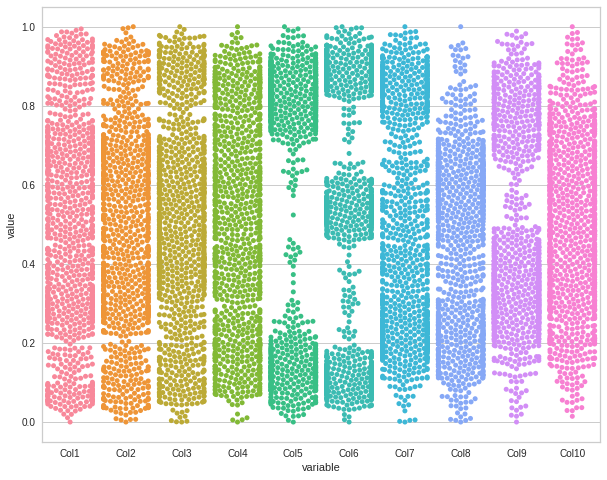

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
sns.swarmplot(x="variable", y="value", data=pd.melt(anomdata))
plt.show()

### Boxplot


---

Median, quartiles, extremes

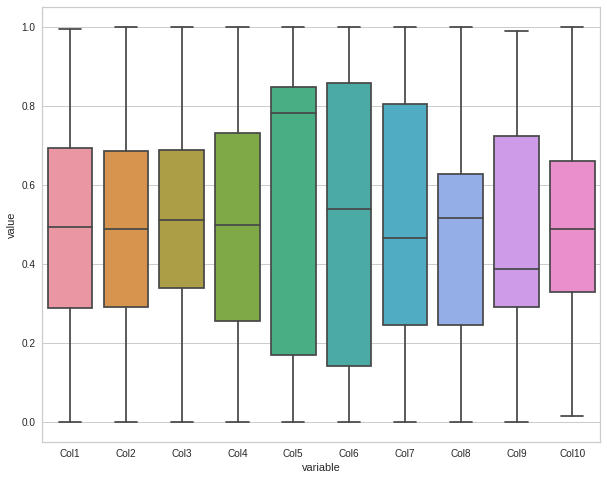

In [ ]:
sns.boxplot(x="variable", y="value", data=pd.melt(anomdata))
plt.show()

### Scatter Plot and Histograms


---
This command plots the density and the distribution of all the columns in context to each other. Makes it easy to identify relationships at a glance.


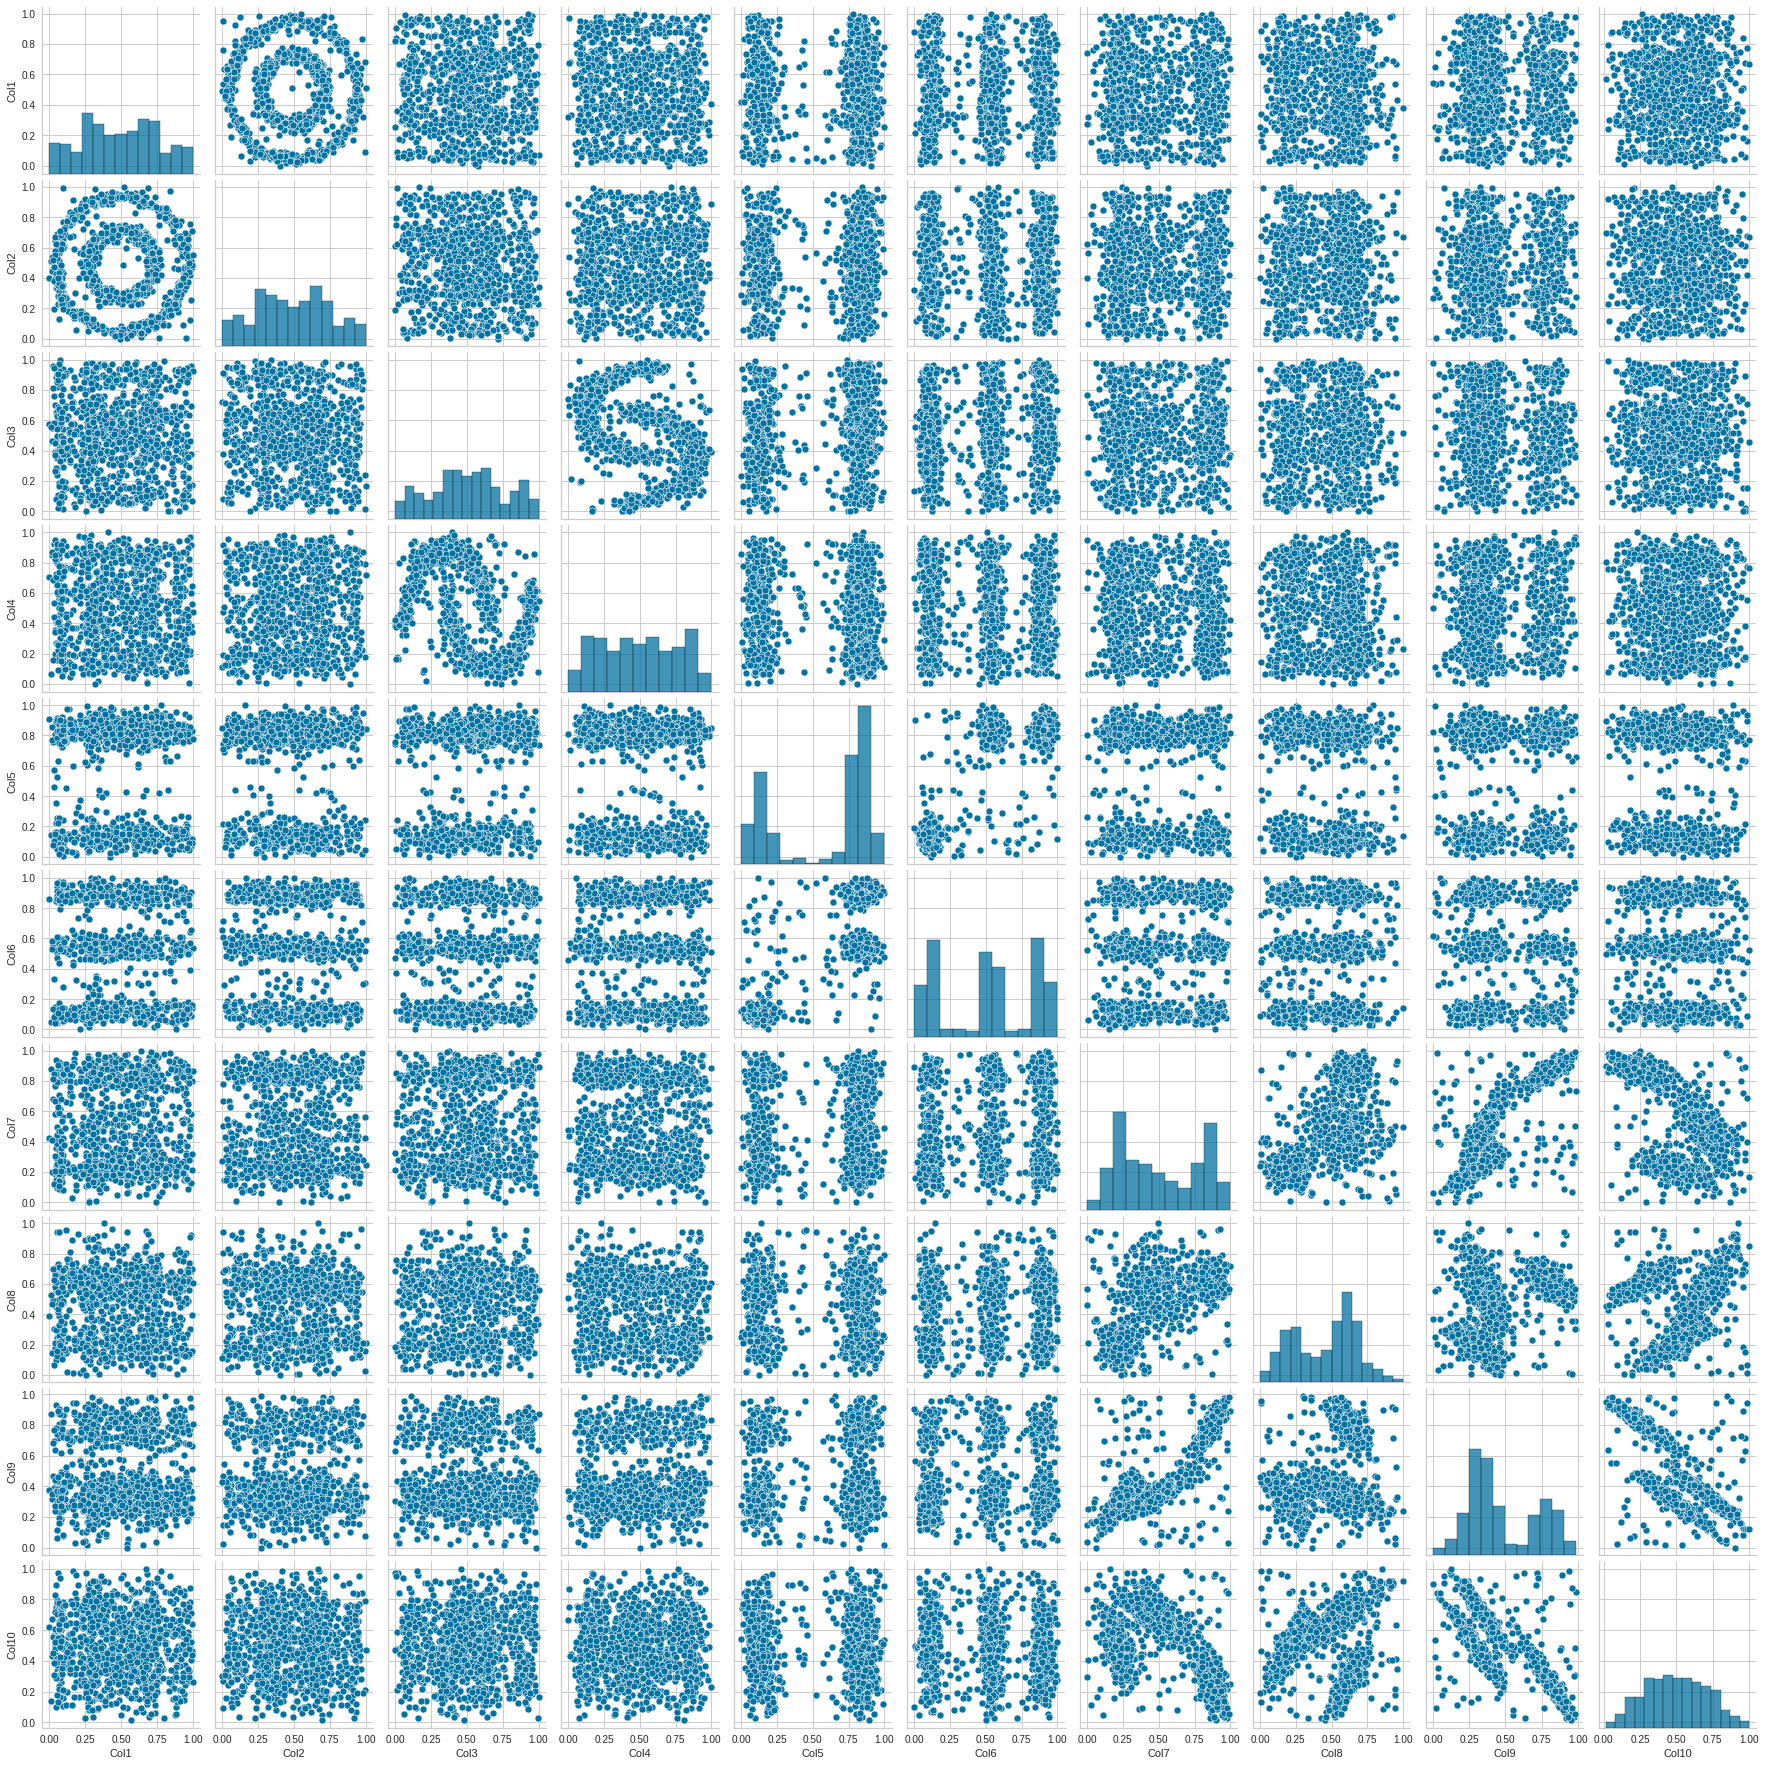

In [ ]:
sns.pairplot(anomdata)

## Anomaly Detection

---
Exploration of Popular Models that are included within the package - allows you to choose the optimal model for your work and experiment with other options easily


### List of Models

In [ ]:
models() ghgjhgjhgjhgjhgjhgjhgjhgjhgjhgjhh

INFO:logs:gpu_param set to False


Name                    Reference
ID                                                                       
abod            Angle-base Outlier Detection        pyod.models.abod.ABOD
cluster       Clustering-Based Local Outlier      pyod.models.cblof.CBLOF
cof         Connectivity-Based Local Outlier          pyod.models.cof.COF
iforest                     Isolation Forest  pyod.models.iforest.IForest
histogram  Histogram-based Outlier Detection        pyod.models.hbos.HBOS
knn             K-Nearest Neighbors Detector          pyod.models.knn.KNN
lof                     Local Outlier Factor          pyod.models.lof.LOF
svm                   One-class SVM detector      pyod.models.ocsvm.OCSVM
pca             Principal Component Analysis          pyod.models.pca.PCA
mcd           Minimum Covariance Determinant          pyod.models.mcd.MCD
sod               Subspace Outlier Detection          pyod.models.sod.SOD
sos             Stochastic Outlier Selection          pyod.models.sos.SOS

### Isolation Forest


---

Differentiates observations by random selection of a feature and randomly selecting split values between the maximum and minimum values. ```Contamination``` is the assumed proportion of anomlies in the data. This is automatically set to 0.05 when the ```fraction ``` is not defined in ```create_model()```



In [ ]:
iforest = create_model('iforest')
iforest

INFO:logs:create_model_container: 3
INFO:logs:master_model_container: 3
INFO:logs:display_container: 4
INFO:logs:IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=7379, verbose=0)
INFO:logs:create_model() succesfully completed......................................


IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=7379, verbose=0)

### Local Outlier Factor


---

local density deviation of a data point with context of its neighbors

In [ ]:
lof = create_model('lof')
lof

INFO:logs:create_model_container: 4
INFO:logs:master_model_container: 4
INFO:logs:display_container: 5
INFO:logs:LOF(algorithm='auto', contamination=0.05, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=-1, n_neighbors=20, novelty=True, p=2)
INFO:logs:create_model() succesfully completed......................................


LOF(algorithm='auto', contamination=0.05, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=-1, n_neighbors=20, novelty=True, p=2)

### K Nearest Neighbors


---

non parametric lazy learning algorithm used to classify data based on similaries and varies metrics. very simple but effective. Awful at scaling though.

In [ ]:
knn = create_model('knn')
print(knn)

INFO:logs:create_model_container: 5
INFO:logs:master_model_container: 5
INFO:logs:display_container: 6
INFO:logs:KNN(algorithm='auto', contamination=0.05, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
  radius=1.0)
INFO:logs:create_model() succesfully completed......................................


KNN(algorithm='auto', contamination=0.05, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
  radius=1.0)


## Comparing Anomalies in Models

### iForest

In [ ]:
iforest_results = assign_model(iforest)
iforest_results

INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=7379, verbose=0), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : Isolation Forest
INFO:logs:Copying data
INFO:logs:(1000, 12)
INFO:logs:assign_model() succesfully completed......................................


Col1      Col2      Col3  ...     Col10  Anomaly  Anomaly_Score
0    0.263995  0.764929  0.138424  ...  0.733591        0      -0.023966
1    0.546092  0.653975  0.065575  ...  0.367422        0      -0.067024
2    0.336714  0.538842  0.192801  ...  0.088600        0      -0.000374
3    0.092108  0.995017  0.014465  ...  0.208463        1       0.062706
4    0.325261  0.805968  0.957033  ...  0.182754        0      -0.001847
..        ...       ...       ...  ...       ...      ...            ...
995  0.305055  0.656837  0.331665  ...  0.242762        0      -0.077903
996  0.812627  0.864258  0.616604  ...  0.671129        0      -0.072127
997  0.250967  0.138627  0.919703  ...  0.234952        0      -0.055455
998  0.502436  0.936820  0.580062  ...  0.538755        0      -0.071457
999  0.457991  0.017755  0.714113  ...  0.307592        0      -0.015322

[1000 rows x 12 columns]

###LOF

In [ ]:
lof_results = assign_model(lof)
lof_results.head()

INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=LOF(algorithm='auto', contamination=0.05, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=-1, n_neighbors=20, novelty=True, p=2), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : Local Outlier Factor
INFO:logs:Copying data
INFO:logs:(1000, 12)
INFO:logs:assign_model() succesfully completed......................................


Col1      Col2      Col3  ...     Col10  Anomaly  Anomaly_Score
0  0.263995  0.764929  0.138424  ...  0.733591        0       1.262565
1  0.546092  0.653975  0.065575  ...  0.367422        0       1.043429
2  0.336714  0.538842  0.192801  ...  0.088600        0       1.331218
3  0.092108  0.995017  0.014465  ...  0.208463        1       1.591832
4  0.325261  0.805968  0.957033  ...  0.182754        0       1.223609

[5 rows x 12 columns]

###KNN

In [ ]:
knn_results = assign_model(knn)
knn_results.head()

INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=KNN(algorithm='auto', contamination=0.05, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
  radius=1.0), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : K-Nearest Neighbors Detector
INFO:logs:Copying data
INFO:logs:(1000, 12)
INFO:logs:assign_model() succesfully completed......................................


Col1      Col2      Col3  ...     Col10  Anomaly  Anomaly_Score
0  0.263995  0.764929  0.138424  ...  0.733591        0       0.569672
1  0.546092  0.653975  0.065575  ...  0.367422        0       0.484217
2  0.336714  0.538842  0.192801  ...  0.088600        1       0.691915
3  0.092108  0.995017  0.014465  ...  0.208463        1       0.811600
4  0.325261  0.805968  0.957033  ...  0.182754        0       0.634337

[5 rows x 12 columns]

In [ ]:
###Filter
iforest_anomaly=iforest_results[iforest_results['Anomaly']==1]
iforest_anomaly.shape
lof_anomaly=lof_results[lof_results['Anomaly']==1]
lof_anomaly.shape
knn_anomaly=knn_results[knn_results['Anomaly']==1]
knn_anomaly.shape

In [ ]:
plot_model(knn)

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(iforest)

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


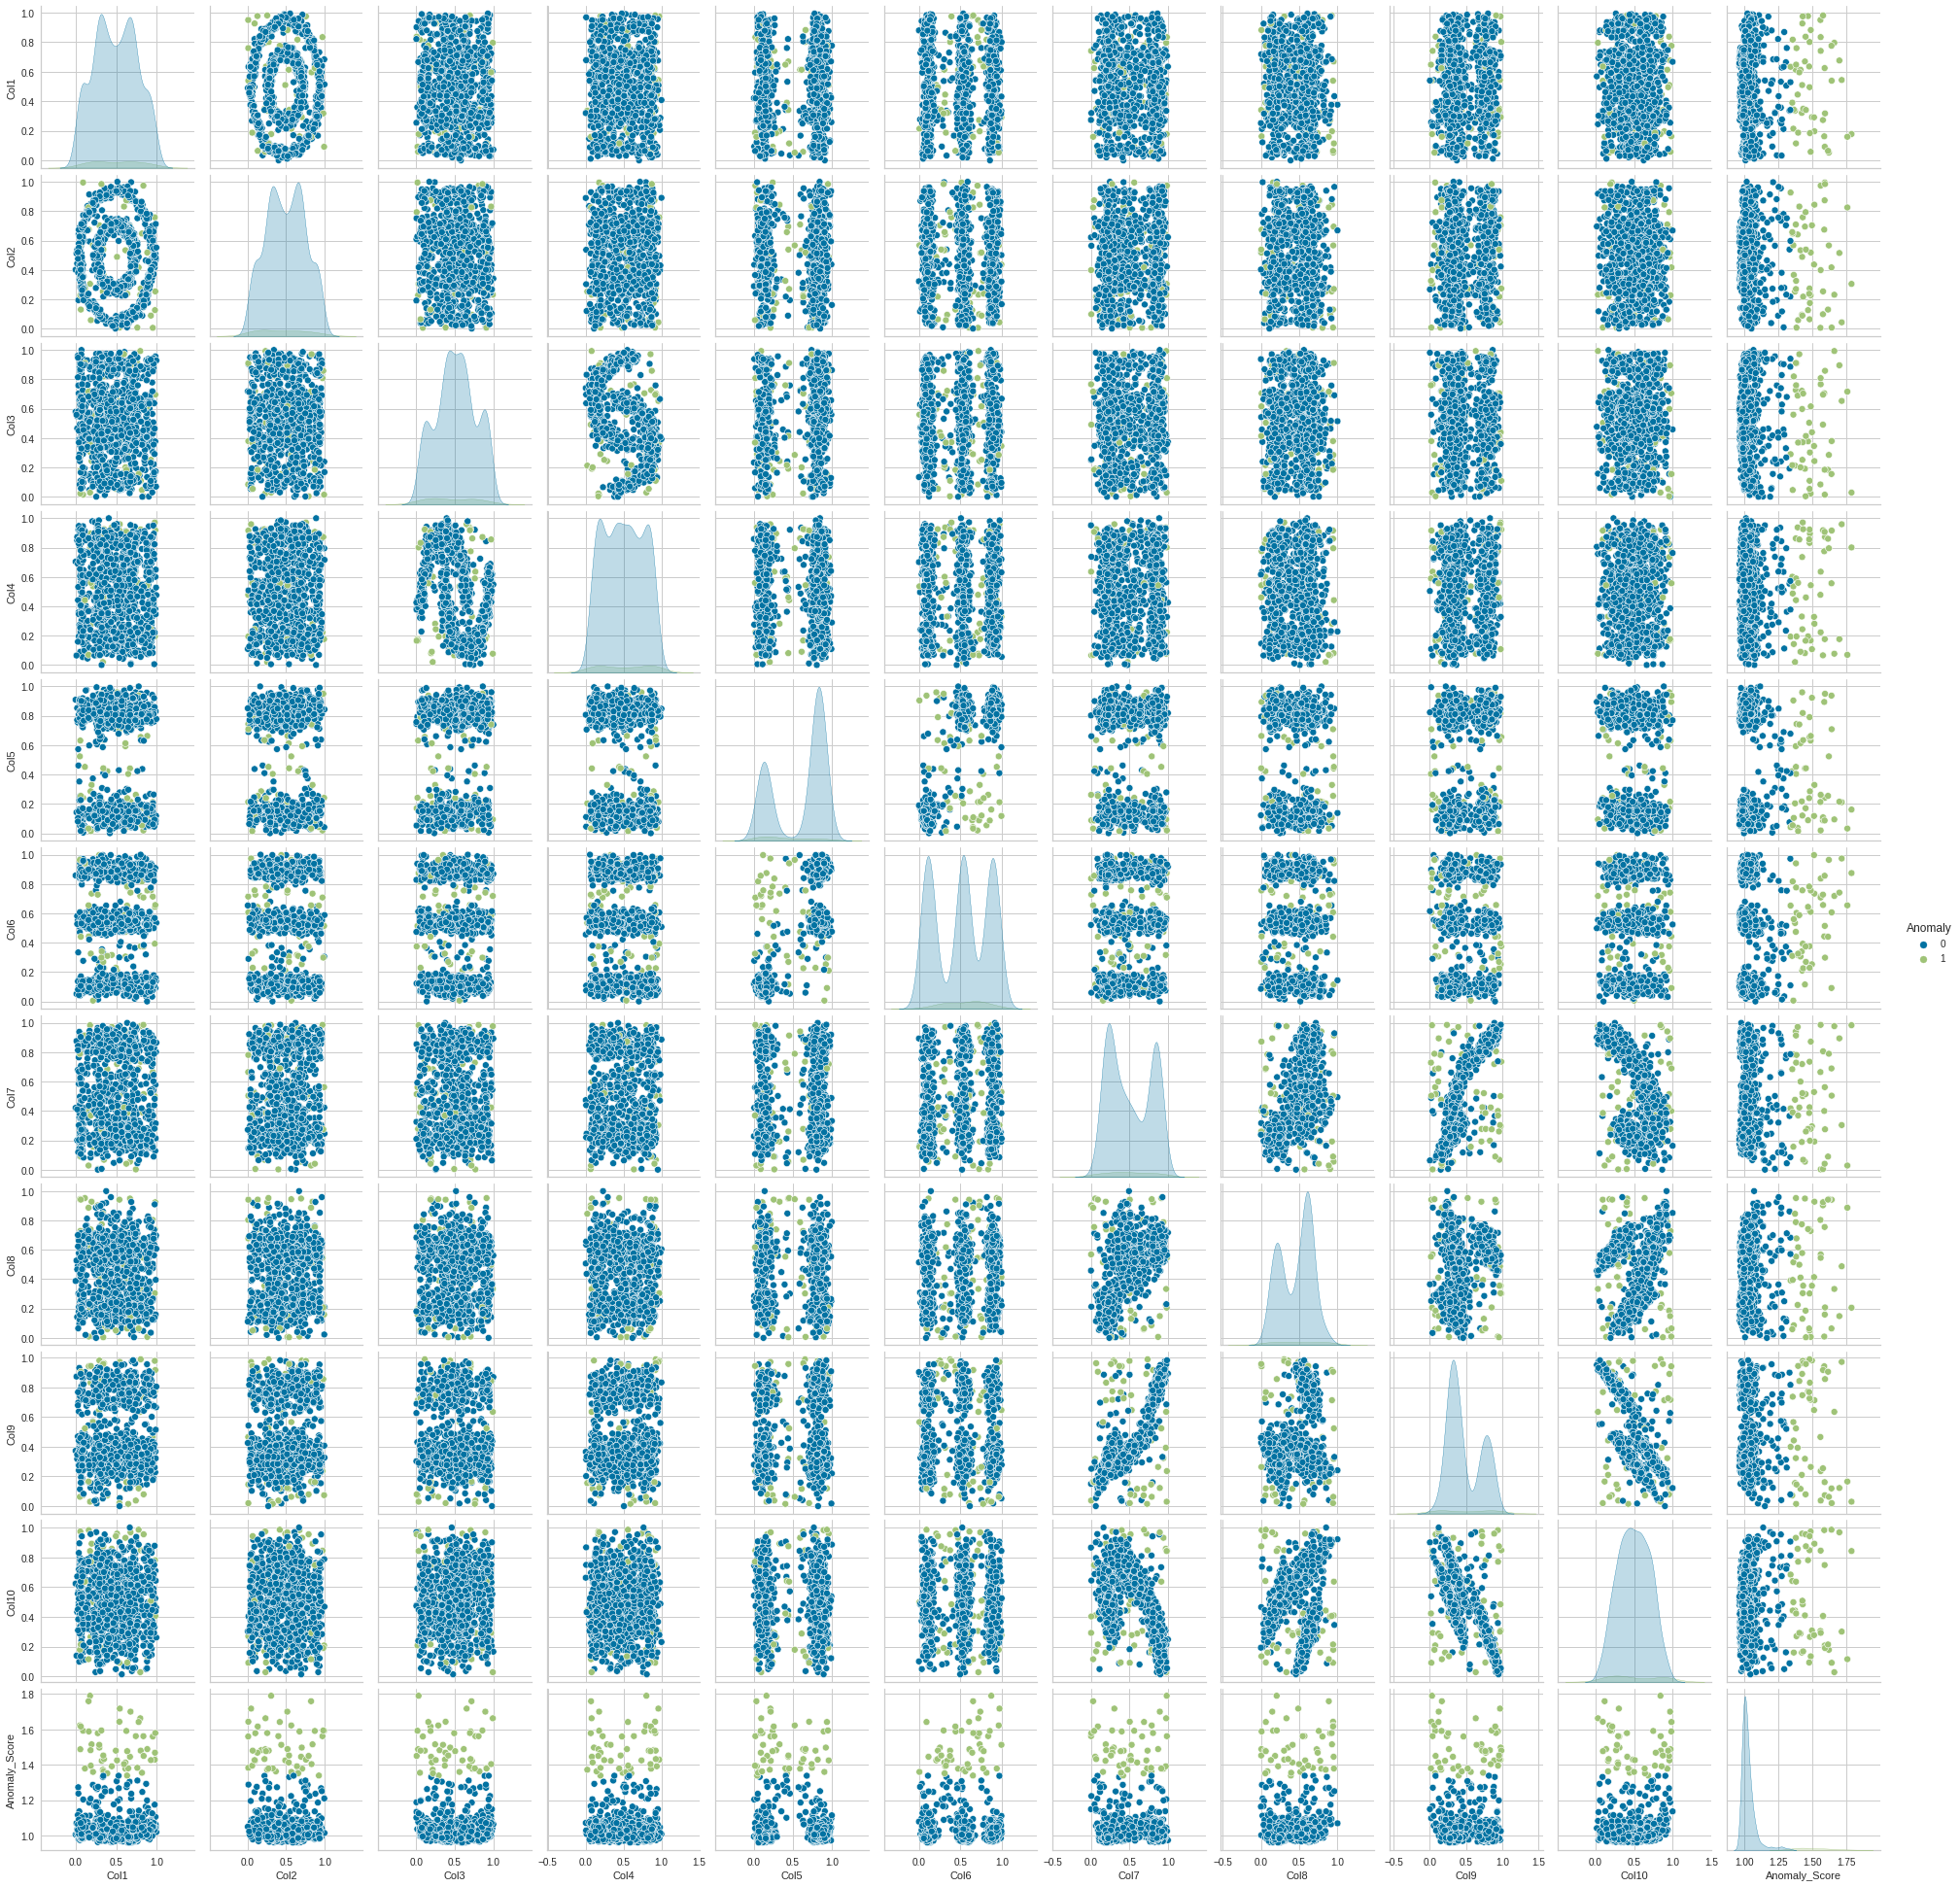

In [ ]:
sns.pairplot(lof_results, hue = "Anomaly")